In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.cm as cm
import cv2
import svmpy
import cvxopt
from cvxopt import solvers
import itertools
import time
import pandas as pd
import os

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'

# 一、设置可以调整的参数

In [6]:
nonroad = 50
road = 50
choice = np.array([0,1])
dimension = choice.size
pic_index = 1
pic_name = r'data\picData\%d.png'%pic_index


## 1、读取图像

In [7]:
RGB = cv2.imread(pic_name)
img = RGB.copy()
# 获取图片维度大小
m = RGB.shape[0]
n = RGB.shape[1]


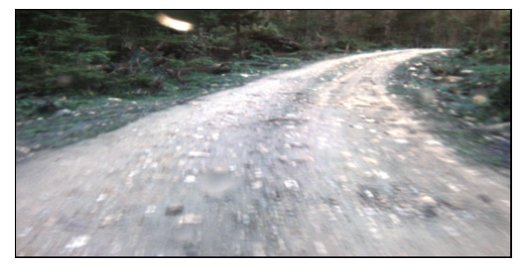

In [8]:
cv2.namedWindow("image")
cv2.imshow("image", img)

plt.xticks([])  #去掉横坐标值
plt.yticks([])  #去掉纵坐标值
plt.imshow(img)
plt.show()

## 2、测试数据输入 

In [12]:
df = pd.read_excel(r'data\testData\2022_10_11_17_13_30__50 points.xls', header = 0)
trnx = df.iloc[:,choice].values
trny = df.iloc[:,-1:].values

## 3、归一化处理 

In [13]:
zs = svmpy.Zscore(trnx)
trnx_ = zs.zscore_sample(trnx)
RGB_ = zs.zscore_sample(RGB[:,:,choice])

# 二、结果显示

In [14]:
def plot_result(pic, model):
    reslm = np.zeros(RGB.shape)
    # 获取图片维度大小
    m = RGB.shape[0]
    n = RGB.shape[1]
    for i in range(m):
        for j in range(n):
            testx = pic[i,j,:].astype(np.double)
            testx = testx.reshape((1,dimension))
            preY = model.predict(testx)
            if preY > 0:
                reslm[i,j,:] = np.array([1.,1.,1.])
            else:
                reslm[i,j,:] = np.array([0,0,0])
    
    plt.xticks([])  #去掉横坐标值
    plt.yticks([])  #去掉纵坐标值
    plt.title("%s" % (model.name), fontsize=16)
    plt.imshow(reslm)
    plt.show()

# 三、通过SVM进行求解

## 1.在原空间进行求解 

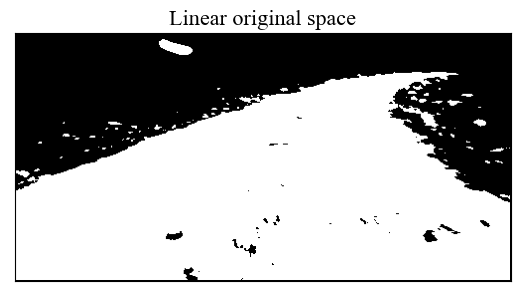

In [15]:
svm1 = svmpy.SVM_original_space()
svm1.train(trnx, trny)
plot_result(RGB[:,:,choice], svm1)

## 2.在对偶空间进行求解 

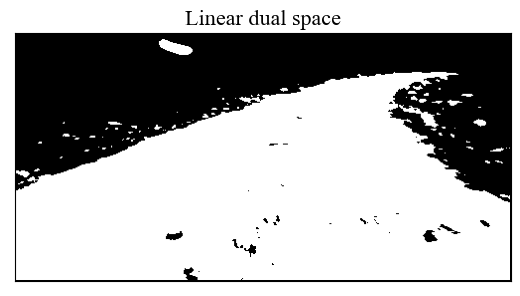

In [16]:
svm2 = svmpy.SVM_dual_space()
svm2.train(trnx, trny)
plot_result(RGB[:,:,choice], svm2)

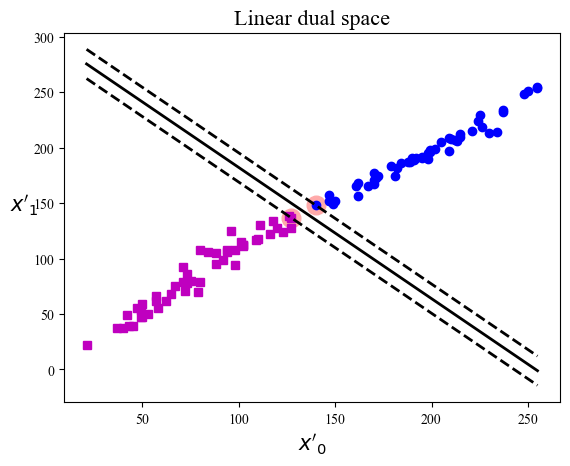

In [17]:
svmpy.draw.plot_svc_decision_boundary(svm2, trnx, trny)
plt.show()

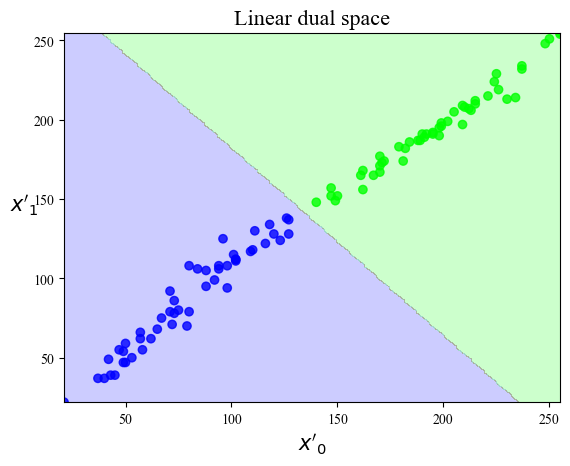

In [18]:
svmpy.draw.plot_svc_decision_boundary2(svm2, trnx, trny)
plt.show()

## 3.软间隔线性SVM

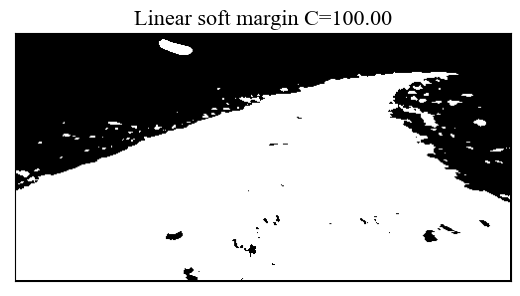

In [19]:
svm3 = svmpy.SVM_soft_margin(C=100)
svm3.train(trnx_, trny)
plot_result(RGB_, svm3)

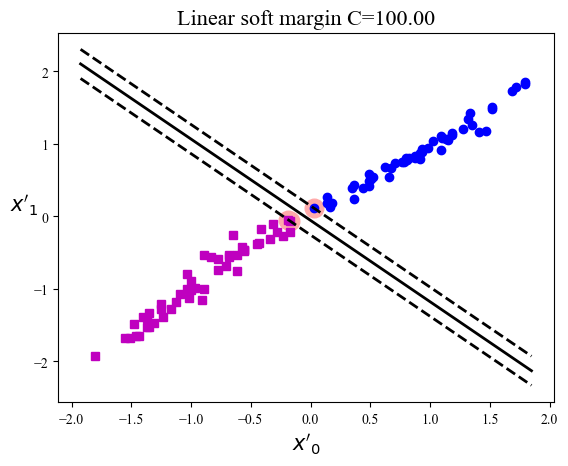

In [20]:
svmpy.draw.plot_svc_decision_boundary(svm3, trnx_, trny)
plt.show()

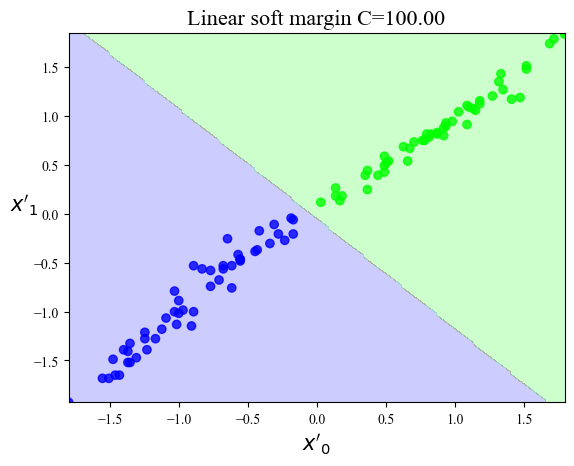

In [21]:
svmpy.draw.plot_svc_decision_boundary2(svm3, trnx_, trny)
plt.show()

## 4.非线性SVM

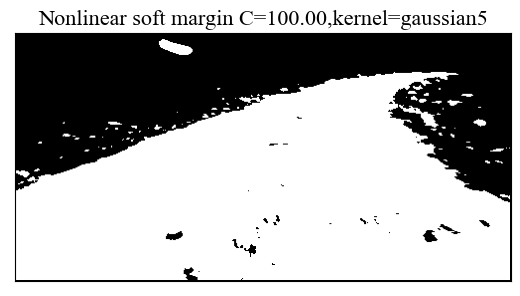

In [22]:
sigma = 5
svm4 = svmpy.SVM(C=100, kernel = svmpy.Kernel.gaussian(sigma), kernelname="gaussian%d"%sigma)
svm4.train(trnx_, trny)
plot_result(RGB_, svm4)

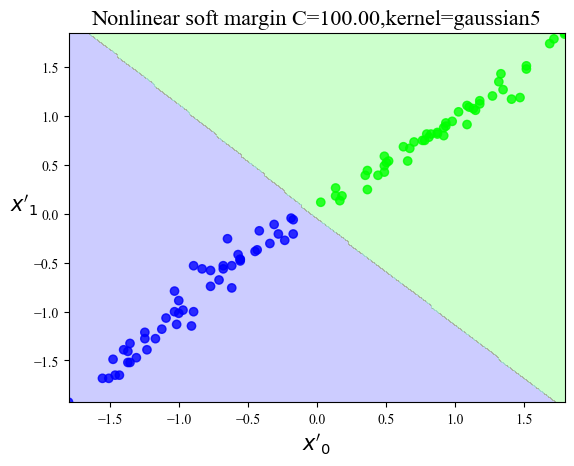

In [23]:
svmpy.plot_svc_decision_boundary2(svm4, trnx_, trny)
plt.show()

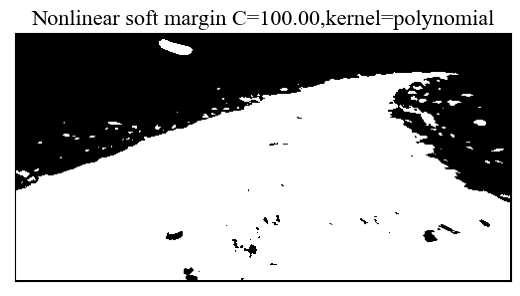

In [24]:
svm5 = svmpy.SVM(C=100, kernel = svmpy.Kernel._polykernel(3,1), kernelname="polynomial")
svm5.train(trnx_, trny)
plot_result(RGB_, svm5)

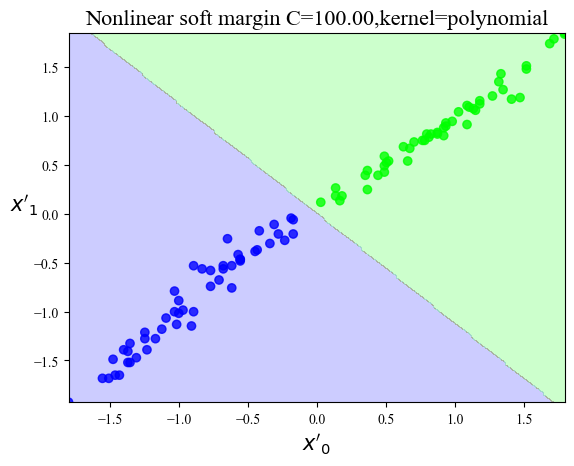

In [25]:
svmpy.plot_svc_decision_boundary2(svm5, trnx_, trny)
plt.show()